# Stat Oblig 3

In [1]:
# Til utregning
import numpy as np
from math import factorial

# Til plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Farger til plots
dark, light = "mediumvioletred", "crimson"

## Oppgave 1

#### a)

$P(E)=0.4,P(F)=0.5,P(E\cup F)=0.8$

$E$ og $F$ er disjunkte hvis $P(E\cup F)=P(E)+P(F)$

$0.4+0.5\neq0.8$

$P(E)$ og $P(F)$ er **ikke** disjunkte.

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>
$E$ og $F$ er uavhengige hvis $P(E\cap F)=P(E)P(F)$

$
P(E\cap F)=P(E)+P(F)-P(E\cup F)\\
P(E\cap F)=0.4+0.5-0.8=0.1,\quad P(E)P(F)=0.2
P(E\cap F)\neq P(E)P(F)
$

$P(E)$ og $P(F)$ **ikke** uavhengige.


#### b)

Sannsynligheten for oljefunn på felt $1$:
$P(C)=P(C\cap D')+P(C\cap D)=0.07+0.14=0.21$
<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>
Sannsynligheten for oljefunn på felt $1$ gitt oljefunn på felt $2$:
$P(C|D)=\frac{P(C\cap D)}{P(D)}
=\frac{P(C\cap D)}{P(C\cap D)+P(C'\cap D)}
=\frac{0.07}{0.07+0.11}\approx0.389$
<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>
Sannsynligheten for oljefunn på felt $1$ gitt at man ikke finner olje på felt $2$:
$P(C|D')=\frac{P(C\cap D')}{P(D')}
=\frac{P(C\cap D')}{P(C\cap D')+P(C'\cap D')}
=\frac{0.14}{0.14+0.68}\approx0.171$
<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

Siden $P(C|D)\neq P(C|D')$ er $C$ og $D$ **ikke** uavhengige.

## Oppgave 2

Orkla (ORK):
$\\E(X)=4\%,\quad V(X)=0.25$

Norsk Hydro (NHY):
$\\E(Y)=6\%,\quad V(Y)=0.49$

$\rho(X,Y)=0.3$

$q=0.3$ og $U=0.3X+0.7Y$

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

**Forventning**

Bruker formelen: $E(aX+bY)=aE(X)+bE(Y)$

$E(U)=0.3E(X)+0.7E(Y)=1.2\%+4.2\%=5.4\%$

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

**Varians**

Bruker formelen: $V(\sum_{i=1}^n a_iX_i)$ for å finne $V(U)$. I dette tilfellet kan formelen skrives: 

$V(0.3^2V(X)+0.7^2V(Y))+2\cdot0.3\cdot0.7\cdot\rho(X,Y)=$

$V(0.09\cdot0.25+0.49\cdot0.49+0.42\rho(X,Y)=$

$0.0225+0.2401+0.126=0.3886$

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

Forventningen til $U$ ligger mellom forventningen til $X$ og $Y$, som gir mening fordi vi eier begge aksjene.

Variansen til $U$ ligger veldig tett på forventningen til $X$ som betyr at vi ikke har valgt en passende $q$.

## Oppgave 3



In [2]:
def pixel(x, y):
    if y == 0:
        return (3 / 100) * (1 - (x / 100))**2
    if y == 1:
        return (3 / 100) * (x / 100)**2

def f(x):
    ps = pixel(x, 0) + pixel(x, 1)
    return ps / 2

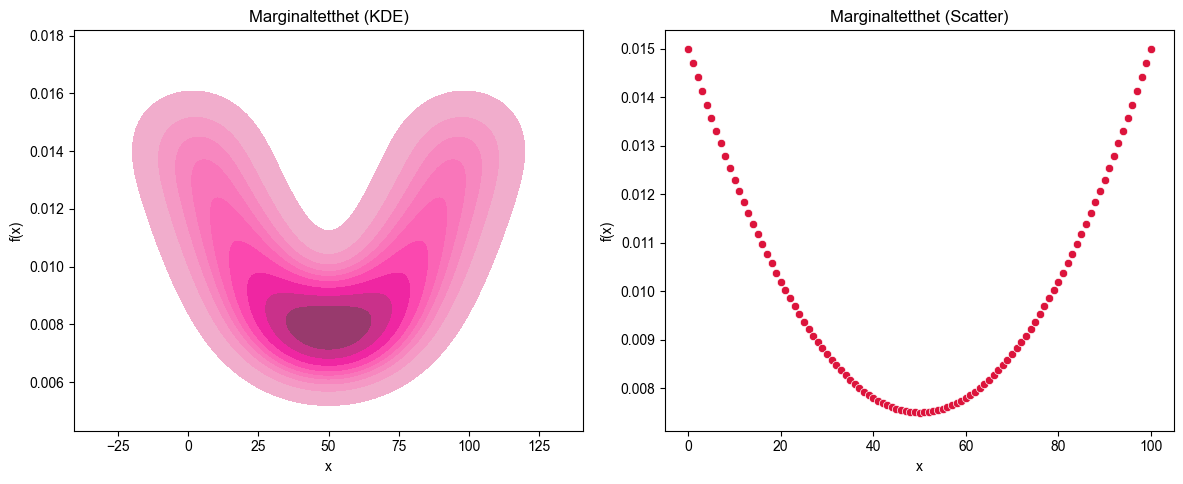

In [3]:
xs = np.arange(101)      # x-verdier
fxs = [f(x) for x in xs] # f(x)-verdier

# Setter opp to plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set(style="whitegrid")

# Kernel Density Estimate
sns.kdeplot(x=xs, y=fxs, fill=True, ax=axes[0], color=dark)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].set_title("Marginaltetthet (KDE)")

# Scatter
sns.scatterplot(x=xs, y=fxs, ax=axes[1], color=light)
axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")
axes[1].set_title("Marginaltetthet (Scatter)")

plt.tight_layout()
plt.show()

In [4]:
def bayes(x):
    return pixel(x, 0) / (2 * f(x))

bayes(29)

0.8570214212852771

$f_{X|Y}(29|0)=\frac{3}{100}(1-\frac{29}{100})^2\approx0.015$

$f_X(29)\approx0.009$

$P(Y=0|X=29)=\frac{f_{X|Y}(29|0)}{2f_X(29)}=\frac{0.015}{2\cdot0.009}\approx0.857$

## Oppgave 4

#### a)

$X\sim poisson(\theta)\\Y\sim poisson(2\theta)$

Observerte verdier: $x=2,\space y=5$

Pmf er gitt ved: $\frac{e^{-\theta}\theta^2}{2!}
\cdot
\frac{e^{-2\theta}(2\theta)^5}{5!}$ 

Derfra får vi $L(\theta)=\frac{e^{-\theta-2\theta}\theta^{2+5}2^5}{2!5!}$

$\Rightarrow L(\theta)=(5ln2-ln2!-ln5!)+7ln\theta-2\theta$

Ekstremalpunkt
x: 2.2, y: -3.085


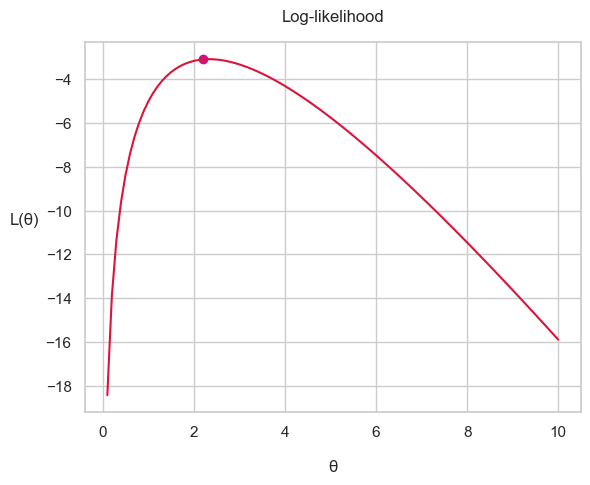

In [5]:
# Kode for uttrykket over
def L(theta):
    return (5*np.log(2)           #  5ln(2)
            -np.log(factorial(2)) # -ln(2!)
            -np.log(factorial(5)) # -ln(5!)
            +7*np.log(theta)      # +7ln(θ)
            -3*theta)             # -3θ


xs = np.arange(0.1, 10.1, 0.1)  # x-verdier
ls = [L(theta) for theta in xs] # L(x)-verdier

# Finner verdiene til x og y i toppunktet
x, y = np.argmax(ls), np.max(ls)

# Deler på 10 fordi x-verdiene (xs) øker med 0.1 og ikke 1
x /= 10 

print("Ekstremalpunkt")
print(f"x: {x}, y: {round(y, 3)}")

sns.set(style="whitegrid")

# Tegner grafen
sns.lineplot(x=xs, y=ls, color=light)

# Tegner toppunktet
plt.scatter(x=x, y=y, color=dark)

plt.xlabel("θ", labelpad=15)
plt.ylabel("L(θ)", labelpad=15, rotation=0)
plt.title("Log-likelihood", pad=15)
plt.show()

#### b)

Finne $\hat{\theta}$ ved å derivere $L$ med hensyn på $\theta$ og sette den deriverte lik $0$.

$\frac{\partial}{\partial\theta}lnL(\theta)=\frac{7}{\theta}-2=0\\
\frac{7}{\theta}-2=0\Rightarrow\hat{\theta}=\frac{7}{2}=3.5
$

For $x=2$ og $y=5$ får vi altså at estimatoren $\hat\theta=3.5$

## Oppgave 5

#### a)

$X_1,X_2,X_3$ er binomisk fordelt med $n=1$ og $p_1=1,p_2=2,p_3=5$

For binomiske fordelinger med $n=1$ har vi $E(X)=np=p$ og $V(X)=np(1-p)=p(1-p)$

Derfor får vi:

$\space\space E(X_1)=\theta,\quad\quad V(X_1)=\theta(1-\theta)$

$E(X_2)=2\theta,\quad\quad V(X_2)=2\theta(1-2\theta)$

$E(X_3)=5\theta,\quad\quad V(X_3)=5\theta(1-5\theta)$


#### b)

**Estimatorer**

$\hat{\theta_1}=\frac{1}{8}(X_1+X_2+X_3)\quad\quad\hat{\theta_2}=\frac{1}{3}(X_1+\frac{X_2}{2}+\frac{X_3}{4})$

La $\theta=0.12$

<p style="font-weight: bold; margin-top: 30px; ">Forventning</p>

$E(\hat{\theta_1})=\frac{1}{8}(E(X_1)+E(X_2)+E(X_3))=
\frac{1}{8}(\theta+2\theta+5\theta)=\frac{8\theta}{8}=\theta=0.12
$

$E(\hat{\theta_2})=\frac{1}{3}(E(X_1)+\frac{E(X_2)}{2}+\frac{E(X_3)}{4})=
\frac{1}{3}(\theta+\frac{2\theta}{2}+\frac{5\theta}{4})=\frac{13\theta}{12}=0.13
$

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

<p style="font-weight: bold; margin-top: 30px;">Varians</p>

$V(\hat{\theta_1})=\frac{1}{8^2}(V(X_1)+V(X_2)+V(X_3))=
\frac{1}{8^2}(\theta(1-\theta)+2\theta(1-2\theta)+5\theta(1-5\theta))\\V(\hat{\theta_1})\approx0.00825$

$V(\hat{\theta_2})=\frac{1}{3^2}(V(X_1)+V(X_2)+V(X_3))=
\frac{1}{3^2}(\theta(1-\theta)+\frac{2\theta(1-2\theta)}{2^2}+\frac{5\theta(1-5\theta)}{4^2})\\V(\hat{\theta_1})\approx0.00185$

<div style="height: 1px; margin: 15px 0; background-color: gray;"></div>

<p style="font-weight: bold; margin-top: 30px;">Hvilken estimator er best?</p>

Når $\theta=0.12$ er $\hat{\theta}_1$ den beste estimatoren fordi den er forventningsrett.